# **UN SDG - NLP classification task**

## **1. Introduction and loading**

### i. Introduction

***What is NLP?***
It is a subfield of artificial intelligence (AI). It helps machines process and understand the human language so that they can automatically perform repetitive tasks.

**Libaries to be used**
> `NLTK`

NLTK - natural language toolkit - is a leading library for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning (more on this stuff below), wrappers for industrial-strength NLP libraries, and an active discussion forum.

> `Sklearn`

Alson known as Scikit-learn. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.

> `Pandas`

It is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language

> `Numpy`

**NumPy** offers comprehensive mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more





### ii. Loading
**Importing libraries**

In [117]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

from nltk.tokenize import TreebankWordTokenizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist

#libraries for feature pre-processing and scaling 
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#libraries for modelling
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

**Loading data**

In [121]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [122]:
train_data.head()

,doi,text_id,text,sdg,labels_negative,labels_positive,agreement,id
0,10.18356/5950d914-en,bf7763beb5ad7a16764d1b7fa87ab018,Indicators for targets 9.b and 9.c have data a...,9,4,5,0.111111,1
1,10.18356/5950d914-en,b6415a528064b85fdde4b4c61239ed3a,Manufacturing value added as a percentage of G...,9,0,3,1.000000,2
2,10.18356/31959a6d-en,29127def7e81b999b87c8e887a4fe882,To Share or Not to Share: That is the Question...,5,2,7,0.555556,3
3,10.1787/eco/surveys-cze-2014-6-en,459db322b9e44630320fda76783e0f69,"As of 2004, parents can work without losing th...",4,2,2,0.000000,4
4,10.1787/9789264119536-11-en,8b7d8c6c605fe9695d08ab03d601e0e9,A question of considerable policy relevance is...,10,1,4,0.600000,5


**The first and the last 5 records**


In [123]:
train_data.tail()

,doi,text_id,text,sdg,labels_negative,labels_positive,agreement,id
25939,10.18356/2d07fa8a-en,eb5757e9da9a0b61a2d8a2bd352f34ce,"But, in general, such programmes neither targe...",2,0,3,1.000000,25940
25940,10.18356/daadf51f-en,2bdeee9dff95a4a110cbb75648582558,"Concentration of refugees in remote camps, as ...",4,1,8,0.777778,25941
25941,10.1787/9789264235151-4-en,0754b035be2628e9a06afea711a04fec,Designating 3.8 million ha for rice production...,2,0,9,1.000000,25942
25942,10.1787/9789264209138-3-en,7dae9220a2463cc1d2b2513c032317a8,Figure 1.1 proposes a simplified framework tha...,6,1,2,0.333333,25943
25943,10.1787/9789264225817-4-en,ba5110491496e704b7aadf7a9def3bb3,Experience from other OECD countries has shown...,3,0,9,1.000000,25944


## Exploratory Data Analysis

### The number of records and columns

In [124]:
train_data.shape

(25944, 8)

In [125]:
test_data.shape

(6487, 7)

In [126]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25944 entries, 0 to 25943
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   doi              25944 non-null  object 
 1   text_id          25944 non-null  object 
 2   text             25944 non-null  object 
 3   sdg              25944 non-null  int64  
 4   labels_negative  25944 non-null  int64  
 5   labels_positive  25944 non-null  int64  
 6   agreement        25944 non-null  float64
 7   id               25944 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 1.6+ MB


From these, we can see that there are no null values in our dataset. 

### Columns

In [7]:
data.columns.to_list()

['doi',
 'text_id',
 'text',
 'sdg',
 'labels_negative',
 'labels_positive',
 'agreement',
 'id']

### Classes

In [128]:
train_data.sdg.unique()

array([ 9,  5,  4, 10,  3,  1, 13, 11,  2,  7,  6,  8, 15, 12, 14],
      dtype=int64)

### Distribution Of Data

In [54]:
# Checking the distribution of the SDG classes 
train_df['sdg'].value_counts()

5     3438
4     2999
7     2473
6     2247
1     2190
3     2132
2     1963
11    1798
13    1695
8     1218
14     917
9      873
10     843
15     785
12     373
Name: sdg, dtype: int64

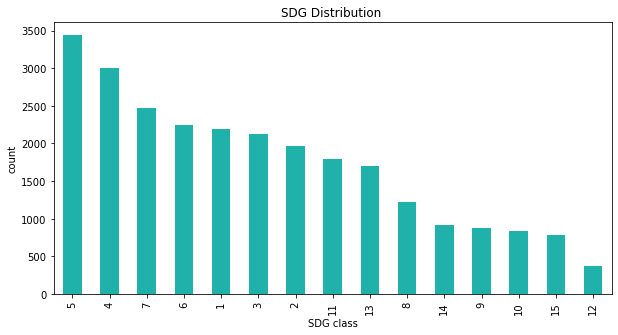

In [130]:
# graphical representaion of class distribution 
train_df['sdg'].value_counts().plot(kind = 'bar', color=['lightseagreen'])
plt.title('SDG Distribution ')
plt.xlabel('SDG class')
plt.ylabel('count')
plt.show()

### Most Common Words

In [114]:
#extract all words in the cleaned data
all_words = train_df['text_lemmatized'].apply(join_w)
#' '.join(word for word in train_df.text_lemmatized)
all_words

0        indicator target b c data available globally e...
1        manufacturing value added percentage gdp stood...
2        share share question volume gender politics fi...
3        parent work without losing entitlement parenta...
4        question considerable policy relevance extent ...
                               ...                        
25939    general programme neither target reach poor ta...
25940    concentration refugee remote camp kenya may re...
25941    designating million ha rice production exclusi...
25942    figure proposes simplified framework summarise...
25943    experience oecd country shown primary careleve...
Name: text_lemmatized, Length: 25944, dtype: object

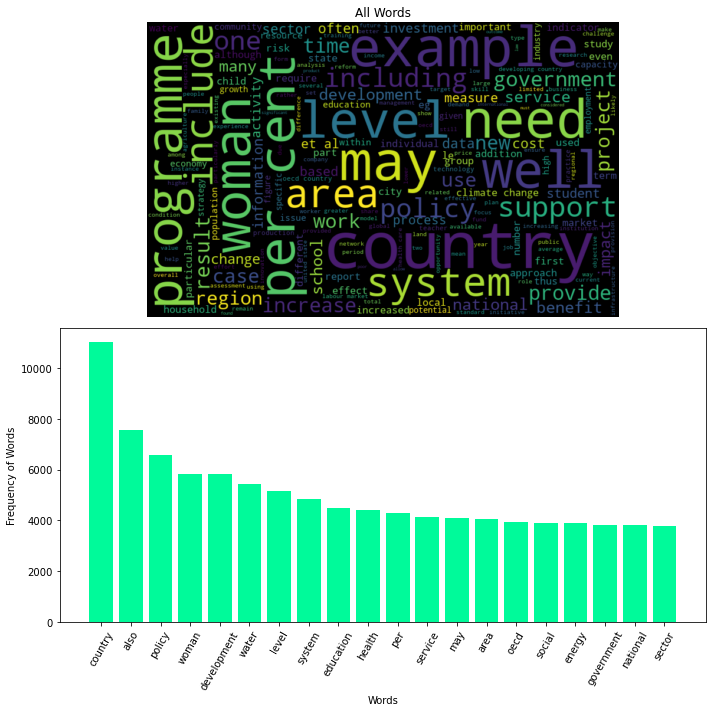

In [149]:
# Visualization of the data
wordcloud = WordCloud(width=800, height=500, max_font_size=110).generate(join_w(all_words))
fig, ax = plt.subplots(2, 1, figsize = (10, 10), facecolor = None)
#plt.figure(figsize=(10, 7))
ax[0].imshow(wordcloud, interpolation="bilinear")
ax[0].set_title("All Words")
ax[0].axis('off')
#plt.show()

mostcommon = FreqDist(join_w(all_words).split(' ')).most_common(20)
x, y = zip(*mostcommon)
ax[1].bar(x, y, color='mediumspringgreen')
ax[1].set_xlabel('Words')
ax[1].set_ylabel('Frequency of Words')
ax[1].tick_params(axis='x', labelrotation=60)

plt.tight_layout()
plt.show()

## Data Pre-processing

### i. Natural Language Processing

### Text Cleaning

- Lowercase Conversion
- Remove Punctuations
- Tokenization
- Remove stop words
- Stemming
- Lemmatizaton

#### Convert to Lowercase

In [120]:
def lower(df):
    df['text'] = df['text'].str.lower()
    return df['text']

#### Remove Punctuation and Digits

In [35]:
def remove_punct(words):
    text=[]
    words=words.split()
    for word in words:
        text.append(''.join([l for l in word if l.isalpha()]))
    return ' '.join(text)

### Tokenization

In [36]:
tokeniser = TreebankWordTokenizer()

### Remove Stop Words

In [37]:
def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

### Stemming

In [38]:
#function to stem our words
def return_stemmer(words):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

### Lemmatization

In [39]:
#function to lemmatize our words
def return_lemmer(words):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

### Pre-processing pipleline

In [150]:
def pre_process(df):
    df['text']=lower(df)
    df['text_punct']=df['text'].apply(remove_punct)
    df['text_token'] = df['text_punct'].apply(tokeniser.tokenize)
    df['text_stop']=df['text_token'].apply(remove_stop_words)
    df['text_stemmed'] = df['text_stop'].apply(return_stemmer)
    df['text_lemmatized'] = df['text_stop'].apply(return_lemmer)
    
    return df

In [153]:
#preprocessing the train data
pre_process(train_data)
train_data.head()

,doi,text_id,text,sdg,labels_negative,labels_positive,agreement,id,text_punct,text_token,text_stop,text_stemmed,text_lemmatized
0,10.18356/5950d914-en,bf7763beb5ad7a16764d1b7fa87ab018,indicators for targets 9.b and 9.c have data a...,9,4,5,0.111111,1,indicators for targets b and c have data avail...,"[indicators, for, targets, b, and, c, have, da...","[indicators, targets, b, c, data, available, g...","[indic, target, b, c, data, avail, global, ene...","[indicator, target, b, c, data, available, glo..."
1,10.18356/5950d914-en,b6415a528064b85fdde4b4c61239ed3a,manufacturing value added as a percentage of g...,9,0,3,1.000000,2,manufacturing value added as a percentage of g...,"[manufacturing, value, added, as, a, percentag...","[manufacturing, value, added, percentage, gdp,...","[manufactur, valu, ad, percentag, gdp, stood, ...","[manufacturing, value, added, percentage, gdp,..."
2,10.18356/31959a6d-en,29127def7e81b999b87c8e887a4fe882,to share or not to share: that is the question...,5,2,7,0.555556,3,to share or not to share that is the question ...,"[to, share, or, not, to, share, that, is, the,...","[share, share, question, volume, gender, polit...","[share, share, question, volum, gender, polit,...","[share, share, question, volume, gender, polit..."
3,10.1787/eco/surveys-cze-2014-6-en,459db322b9e44630320fda76783e0f69,"as of 2004, parents can work without losing th...",4,2,2,0.000000,4,as of parents can work without losing their e...,"[as, of, parents, can, work, without, losing, ...","[parents, work, without, losing, entitlement, ...","[parent, work, without, lose, entitl, parent, ...","[parent, work, without, losing, entitlement, p..."
4,10.1787/9789264119536-11-en,8b7d8c6c605fe9695d08ab03d601e0e9,a question of considerable policy relevance is...,10,1,4,0.600000,5,a question of considerable policy relevance is...,"[a, question, of, considerable, policy, releva...","[question, considerable, policy, relevance, ex...","[question, consider, polici, relev, extent, ch...","[question, considerable, policy, relevance, ex..."


In [154]:
#preprocessing the test data
test_data=pre_process(test_data)

Saving the pre-processed data to a CSV file so that we do not have to repeat the process each time:

In [92]:
#data.to_csv('clean_train.csv', index=None)
from ast import literal_eval
train_df=pd.read_csv('clean_train.csv', converters={'text_lemmatized': literal_eval})
train_df.head()

,doi,text_id,text,sdg,labels_negative,labels_positive,agreement,id,text_punct,text_token,text_stop,text_stemmed,text_lemmatized
0,10.18356/5950d914-en,bf7763beb5ad7a16764d1b7fa87ab018,indicators for targets 9.b and 9.c have data a...,9,4,5,0.111111,1,indicators for targets b and c have data avail...,"['indicators', 'for', 'targets', 'b', 'and', '...","['indicators', 'targets', 'b', 'c', 'data', 'a...","['indic', 'target', 'b', 'c', 'data', 'avail',...","[indicator, target, b, c, data, available, glo..."
1,10.18356/5950d914-en,b6415a528064b85fdde4b4c61239ed3a,manufacturing value added as a percentage of g...,9,0,3,1.000000,2,manufacturing value added as a percentage of g...,"['manufacturing', 'value', 'added', 'as', 'a',...","['manufacturing', 'value', 'added', 'percentag...","['manufactur', 'valu', 'ad', 'percentag', 'gdp...","[manufacturing, value, added, percentage, gdp,..."
2,10.18356/31959a6d-en,29127def7e81b999b87c8e887a4fe882,to share or not to share: that is the question...,5,2,7,0.555556,3,to share or not to share that is the question ...,"['to', 'share', 'or', 'not', 'to', 'share', 't...","['share', 'share', 'question', 'volume', 'gend...","['share', 'share', 'question', 'volum', 'gende...","[share, share, question, volume, gender, polit..."
3,10.1787/eco/surveys-cze-2014-6-en,459db322b9e44630320fda76783e0f69,"as of 2004, parents can work without losing th...",4,2,2,0.000000,4,as of parents can work without losing their e...,"['as', 'of', 'parents', 'can', 'work', 'withou...","['parents', 'work', 'without', 'losing', 'enti...","['parent', 'work', 'without', 'lose', 'entitl'...","[parent, work, without, losing, entitlement, p..."
4,10.1787/9789264119536-11-en,8b7d8c6c605fe9695d08ab03d601e0e9,a question of considerable policy relevance is...,10,1,4,0.600000,5,a question of considerable policy relevance is...,"['a', 'question', 'of', 'considerable', 'polic...","['question', 'considerable', 'policy', 'releva...","['question', 'consider', 'polici', 'relev', 'e...","[question, considerable, policy, relevance, ex..."


### iii. Drop Observations

In [93]:
train_df['percentage_positive']=(train_df['labels_positive']/(train_df['labels_positive']+train_df['labels_negative']))*100

In [94]:
train_df.head()

,doi,text_id,text,sdg,labels_negative,labels_positive,agreement,id,text_punct,text_token,text_stop,text_stemmed,text_lemmatized,percentage_positive
0,10.18356/5950d914-en,bf7763beb5ad7a16764d1b7fa87ab018,indicators for targets 9.b and 9.c have data a...,9,4,5,0.111111,1,indicators for targets b and c have data avail...,"['indicators', 'for', 'targets', 'b', 'and', '...","['indicators', 'targets', 'b', 'c', 'data', 'a...","['indic', 'target', 'b', 'c', 'data', 'avail',...","[indicator, target, b, c, data, available, glo...",55.555556
1,10.18356/5950d914-en,b6415a528064b85fdde4b4c61239ed3a,manufacturing value added as a percentage of g...,9,0,3,1.000000,2,manufacturing value added as a percentage of g...,"['manufacturing', 'value', 'added', 'as', 'a',...","['manufacturing', 'value', 'added', 'percentag...","['manufactur', 'valu', 'ad', 'percentag', 'gdp...","[manufacturing, value, added, percentage, gdp,...",100.000000
2,10.18356/31959a6d-en,29127def7e81b999b87c8e887a4fe882,to share or not to share: that is the question...,5,2,7,0.555556,3,to share or not to share that is the question ...,"['to', 'share', 'or', 'not', 'to', 'share', 't...","['share', 'share', 'question', 'volume', 'gend...","['share', 'share', 'question', 'volum', 'gende...","[share, share, question, volume, gender, polit...",77.777778
3,10.1787/eco/surveys-cze-2014-6-en,459db322b9e44630320fda76783e0f69,"as of 2004, parents can work without losing th...",4,2,2,0.000000,4,as of parents can work without losing their e...,"['as', 'of', 'parents', 'can', 'work', 'withou...","['parents', 'work', 'without', 'losing', 'enti...","['parent', 'work', 'without', 'lose', 'entitl'...","[parent, work, without, losing, entitlement, p...",50.000000
4,10.1787/9789264119536-11-en,8b7d8c6c605fe9695d08ab03d601e0e9,a question of considerable policy relevance is...,10,1,4,0.600000,5,a question of considerable policy relevance is...,"['a', 'question', 'of', 'considerable', 'polic...","['question', 'considerable', 'policy', 'releva...","['question', 'consider', 'polici', 'relev', 'e...","[question, considerable, policy, relevance, ex...",80.000000


<AxesSubplot:>

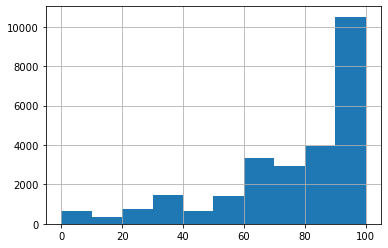

In [95]:
train_df['percentage_positive'].hist()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='percentage_positive', ylabel='Density'>

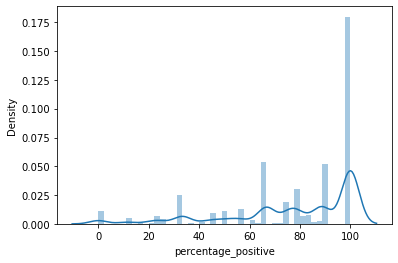

In [96]:
sns.distplot(train_df['percentage_positive'])

In [97]:
data1=train_df[train_df['percentage_positive']==100]
data1.shape

(10369, 14)

<AxesSubplot:>

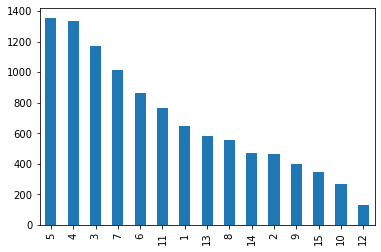

In [98]:
data1['sdg'].value_counts().plot(kind='bar')

### iii. Drop Columns

In [102]:
def drop(df):
    columns=['doi', 'text_id', 'labels_negative', 'labels_positive', 'agreement','percentage_positive']
    df=df.drop(columns, axis=1)
    return df

In [103]:
data1_train=drop(data1)
data1_train=data1_train.set_index('id')
data1_train.head()

,text,sdg,text_punct,text_token,text_stop,text_stemmed,text_lemmatized
id,,,,,,,
2,manufacturing value added as a percentage of g...,9,manufacturing value added as a percentage of g...,"['manufacturing', 'value', 'added', 'as', 'a',...","['manufacturing', 'value', 'added', 'percentag...","['manufactur', 'valu', 'ad', 'percentag', 'gdp...","[manufacturing, value, added, percentage, gdp,..."
9,one method to induce a sensation of travelling...,11,one method to induce a sensation of travelling...,"['one', 'method', 'to', 'induce', 'a', 'sensat...","['one', 'method', 'induce', 'sensation', 'trav...","['one', 'method', 'induc', 'sensat', 'travel',...","[one, method, induce, sensation, travelling, h..."
13,the approach in this framework is that the bas...,3,the approach in this framework is that the bas...,"['the', 'approach', 'in', 'this', 'framework',...","['approach', 'framework', 'basis', 'measuremen...","['approach', 'framework', 'basi', 'measur', 'c...","[approach, framework, basis, measurement, cont..."
15,these behaviours are related to several major ...,3,these behaviours are related to several major ...,"['these', 'behaviours', 'are', 'related', 'to'...","['behaviours', 'related', 'several', 'major', ...","['behaviour', 'relat', 'sever', 'major', 'dise...","[behaviour, related, several, major, disease, ..."
18,"yet, about 800 million people suffer from hung...",2,yet about million people suffer from hunger a...,"['yet', 'about', 'million', 'people', 'suffer'...","['yet', 'million', 'people', 'suffer', 'hunger...","['yet', 'million', 'peopl', 'suffer', 'hunger'...","[yet, million, people, suffer, hunger, malnutr..."


## Data Engineering

In [80]:
def join_w(words):
    words=' '.join(words)
    return words

In [81]:
#Vectorize our text data so as to transform our text into numbers. This way, it can be accpeted by our model.
vect = TfidfVectorizer(lowercase=False, stop_words='english', ngram_range=(1, 4))
vect_dict= vect.fit_transform(data1_train['text_lemmatized'].apply(join_w))